# LinearRegression
- time：2019-8-31
- author：HB

In [1]:
# 导入数据分析所需要的包
import pandas as pd   # 快速数据处理包
import seaborn as sns  # seaborn包为数据可视化, Matplotlib的进一步封装
sns.set(context="notebook",style="whitegrid",palette="dark")  # 设置图形样式
import matplotlib.pyplot as plt  # Matplotlib提供了一种有效的 MatLab 开源替代方案
import numpy as np   # 常用的数值计算包

## Get data(univariant)

In [2]:
# 从外部文件中进行数据读取
df = pd.read_csv('ex1data1.txt',names=['population','profit']);  # 读取数据并赋予列名
df.head(); # 查看前五行数据
# df.info(); # 显示数据的一些对象信息和内存使用

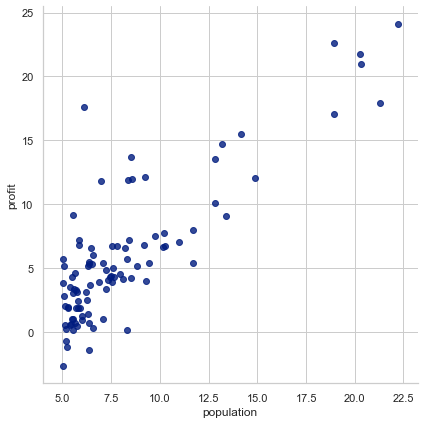

In [3]:
# 画出数据集
sns.lmplot('population','profit',df,height=6,fit_reg=False);  # fit_reg如果为True，则估计并绘制与x和y变量相关的回归模型
plt.show();

## Get data(multivariable) 

In [4]:
dfm = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms' ,'price'])
dfm.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Public part

In [5]:
# 进行特征缩放
def normalize_feature(df):
    # DataFrame.apply(func, axis=0, .... args=(), **kwds) axis=0, 则从df中取一列数据到匿名参数中进行计算
    # data = (df - df.mean())/df.std(); data.head();  <- 进行特征缩放方法2
    return df.apply(lambda column: (column - column.mean())/column.std());  

# 读取特征数据
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))});  # 生产m行1列的数据（）; 其中np.ones(X)生产X个值为1的数组
    # 调用特征缩放函数
    df = normalize_feature(df);
    data = pd.concat([ones,df],axis=1);   # 数据合并（ones 和 df 合并）; axis = 1表示横向合并，默认值为axis = 0;  
    return data.iloc[:,:-1].values;  # data.iloc[:,:-1].as_matrix()返回矩阵; iloc()方法通过位置索引获得数据，':'表示获得所有数据;as_matrix()用于进行dataframe到array的转换（但是高版本该方法被取缔）

# 读取标签
def get_y(df):
    # 调用特征缩放函数
    return df.iloc[:,-1].values;    # np.array(df.iloc[:,-1])，该方法把dataframe转化为数组形式, -1表示最后一列;  ; 


In [6]:
# 计算代价函数
def computeCost(X, y, theta):
    sqrError = np.power([((X * theta) - y)], 2);
    return np.sum(sqrError) / (2 * len(X));

## Get X,y (univariant)

In [7]:
# 取出X,y（单变量）
X = get_X(df);
y = get_y(df);
# 需要把y转换为矩阵(本来y是数组,转为矩阵后为(1,97),所以需要进行转置)。为什么X不转矩阵呢？可能行数大于1且np.concat()的作用
y = np.matrix(y).T;
# 单变量代价函数有效性测试 期待值 32.07
theta = np.zeros(X.shape[1]);  # X.shape[1]=2,代表特征数n 其中索引1表示列, 0表示行
theta = np.matrix(theta).T;
J = computeCost(X,y,theta); 
J

32.072733877455676

# Get X,y (multivariable)

In [8]:
# 取出Xm,ym（多变量）
Xm = get_X(dfm);
ym = get_y(dfm);
ym = np.matrix(ym).T;
# 多变量代价函数有效性测试 期待值 65591548106.45744
theta = np.zeros(Xm.shape[1]);  # X.shape[1]=2,代表特征数n 其中索引1表示列, 0表示行
theta = np.matrix(theta).T;
J = computeCost(Xm,ym,theta); 
J

65591548106.45744

## Public part

In [9]:
# 梯度下降函数实现
def gradientDescent(X,y,theta,iterations,alpha):
    cost = np.zeros(iterations);
    for i in range(iterations):
        Error = X.T*(X*theta - y);
        theta = theta - (alpha/len(X))*Error;
        cost[i] = computeCost(X,y,theta);
    return theta,cost;

## GradientDescent(univariant) 

In [10]:
# 初始化梯度下降参数
iterations=1500;
alpha=0.01;
theta = np.zeros(X.shape[1]);  # X.shape[1]=2,代表特征数n 其中索引1表示列, 0表示行
theta = np.matrix(theta).T;
# 梯度下降函数测试（记住！ 特征缩放与没有缩放的theta值有不同）
theta,cost = gradientDescent(X,y,theta,iterations,alpha);

# 求得平均值和标准差，因为新的X值也需要进行特征缩放; 
meanValue = df.mean().values;
stdValue = df.std().values;
# 单变量预测检验
# population = 3.5时，期待y值为0.27984
x = [1,(3.5 - meanValue[0])/stdValue[0]];  
np.matrix(x)*theta

matrix([[0.27983706]])

## Plot picture(univariant)

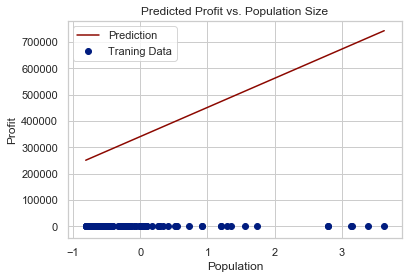

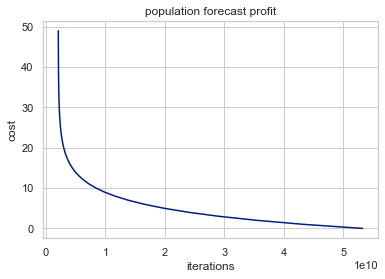

In [17]:
# 绘制拟合图像(若使用了特征缩放，则绘制图形时的X值，需要使用缩放之后的值)
x = np.linspace(X[:,1].min(), X[:,1].max(), 100);  # 横坐标(从最小值 -最大值，分为100份 )
f = theta[0, 0] + (theta[1, 0] * x);  # 纵坐标，利润
# 把y变为数组形式
y = np.array(y);
fig, ax = plt.subplots(1,1,figsize=(6,4)); # 创建一个画布，并返回一个6*4的子图;  此函数可分解为 # fig = plt.figure() ;ax = fig.add_subplot(1,1,1)
ax.plot(x, f, 'r', label='Prediction');  # 绘制假设函数
ax.scatter(X[:,1], y, label='Traning Data');  # 绘制散点图
ax.legend(loc=2)  # 2表示在左上角（放置描述信息）
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()


# 代价函数可视化
ax = sns.lineplot(cost,np.arange(iterations)); # 使用的是线图
ax.set_xlabel('iterations');
ax.set_ylabel('cost');
ax.set_title('population forecast profit');
plt.show();

## GradientDescent(multivariable)

In [12]:
# 初始化梯度下降参数
iterations=50;
alpha=0.1;
theta = np.zeros(Xm.shape[1]);  # X.shape[1]=2,代表特征数n 其中索引1表示列, 0表示行
theta = np.matrix(theta).T;
# 梯度下降函数测试（记住！ 特征缩放与没有缩放的theta值有不同）
theta,cost = gradientDescent(Xm,ym,theta,iterations,alpha);

# 求得平均值和标准差，因为新的X值也需要进行特征缩放; 
meanValue = dfm.mean().values;
stdValue = dfm.std().values;
# 多变量预测检验
# square = 1650, beadrooms=3时，期待y值为292748.08523215
x = [1,(1650 - meanValue[0])/stdValue[0],(3 - meanValue[1])/stdValue[1]]; 
np.matrix(x)*theta

matrix([[292748.08523215]])

## Plot picture(multivariable)

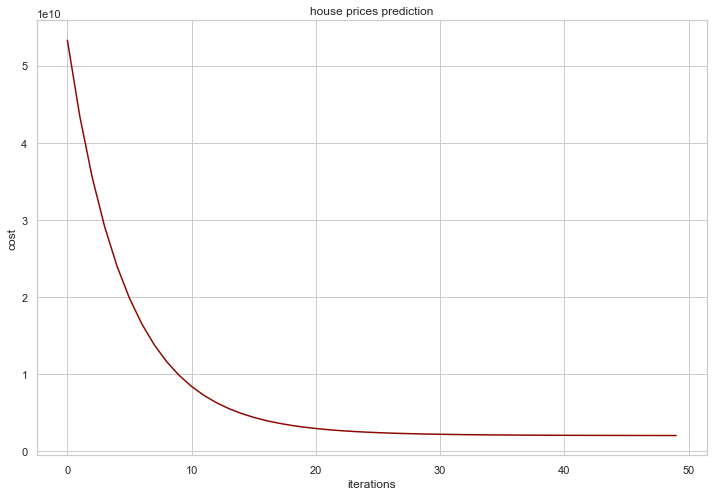

In [13]:
fig,ax = plt.subplots(figsize=(12,8));
ax.plot(np.arange(iterations),cost,'r');
ax.set_xlabel('iterations');
ax.set_ylabel('cost');
ax.set_title('house prices prediction');
plt.show();

## Normal function

In [14]:
# 正规方程实现
def normalFunction(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y;  # np.linalg.inv用以求矩阵逆; @相当于X.T.dot(X)； dot()是矩阵乘法; *是矩阵元素两两相乘
    return theta;

In [15]:
# 单变量测试
theta = normalFunction(X,y);
theta
# 多变量测试
theta = normalFunction(Xm,ym);
theta

matrix([[340412.65957447],
        [110631.05027885],
        [ -6649.47427082]])